In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [118]:
# define the primitive function
def primitive(A, B, C, D, E, x):
  return A / 5 * x ** 5 + B / 4 * x ** 4 + C / 3 * x ** 3 + D / 2 * x ** 2 + E * x

# define the integral function
def integral(Xarray, A, B, C, D, E):
  min = Xarray[0]
  max = Xarray[np.shape(x)[0] - 1]
  return primitive(A, B, C, D, E, max) - primitive(A, B, C, D, E, min)

# function that returns randomly the y values of a 4 order polynomial
def polynomial(Xarray):
  A = np.random.uniform(-0.01, 0.01)
  B = np.random.uniform(-0.1, 0.1)
  C = np.random.uniform(-0.1, 0.1)
  D = np.random.uniform(-1, 1)
  E = np.random.uniform(-1, 1)
  dim = np.shape(Xarray)
  return [np.array([[integral(Xarray, A, B, C, D, E)]]), A * Xarray ** 4 + B * Xarray ** 3 + C * Xarray ** 2 + D * Xarray + E] # 0 is area, 1 is the y values

In [119]:
x = np.linspace(-3, 3, 1000)
# generate the full dataset
n_samples = 5000
data = [polynomial(x) for i in range(n_samples)]
input = np.array([data[i][1] for i in range(n_samples)])
output = np.array([data[i][0] for i in range(n_samples)])

# slice it into train and test
d_train = input[:int(n_samples * 0.8)]
y_train = output[:int(n_samples * 0.8)]

d_test = input[int(n_samples * 0.8):]
y_test = output[int(n_samples * 0.8):]

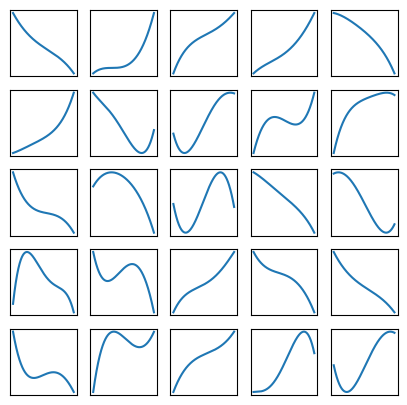

In [120]:
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.plot(x, input[i])
    #plt.xlabel(class_names[label])
plt.show()

In [121]:
# define our model. It has just 2 layers, 0 hidden
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=np.shape(x)[0], input_shape=np.shape(x)),
    tf.keras.layers.Dense(units=1)
])

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.0001))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [122]:
history = model.fit(d_train, y_train, epochs=20, batch_size = 32, verbose=True)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2039
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2159e-05
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6147e-06
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3012e-07
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9791e-08
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1232e-09
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2534e-11
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0472e-11
Epoch 9/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.5666e-12
Epoch 10/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.8494e-12
Epoch 11/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1760e-12
Epoch 12/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4090e-12
Epoch 13/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6726e-12
Epoch 14/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1598e-12
Epoch

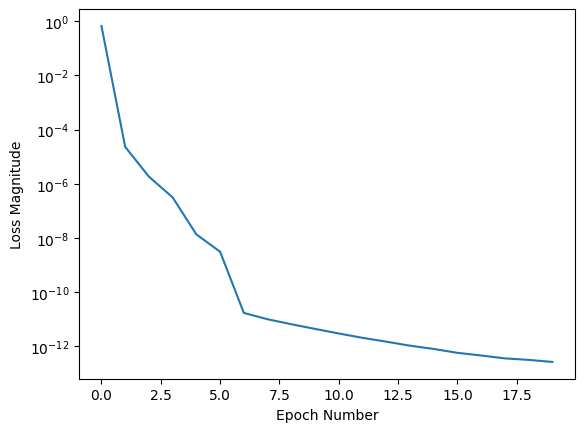

In [123]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.yscale('log')
plt.show()

In [124]:
# evaluate the model with the rest of the data
test_error = model.evaluate(d_test, y_test, batch_size=32)
print('Mean error:', test_error)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7902e-13
Mean error: 2.9877760421986865e-13


In [141]:
# example, gaussian
def gauss(X):
  return np.exp(-X **2)

def cos(X):
  return np.cos(X)

def fun(X):
  return X ** 3 * np.exp(X)

y2 = np.array([gauss(x)])
predict = model.predict(y2)[0][0]
print("Gaussian")
print("Predicted area:", predict, "\nExpected area:", 1.77241469652)
print("Error:", (1.77241469652 - predict) ** 2, "\n")

y2 = np.array([cos(x)])
predict = model.predict(y2)[0][0]
print("Cosine")
print("Predicted area:", predict, "\nExpected area:", 0.28224001612)
print("Error:", (0.28224001612 - predict) ** 2, "\n")

y2 = np.array([fun(x)])
predict = model.predict(y2)[0][0]
print("Squared and exponential")
print("Predicted area:", predict, "\nExpected area:", 99.5813044537)
print("Error:", (99.5813044537 - predict) ** 2, "\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Gaussian
Predicted area: 1.7523017 
Expected area: 1.77241469652
Error: 0.00040453242 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Cosine
Predicted area: 0.30594042 
Expected area: 0.28224001612
Error: 0.00056170975 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Squared and exponential
Predicted area: 241.72617 
Expected area: 99.5813044537
Error: 20205.164 

